# Machine Learning Laboration
---
- Categorize datapoints of width/height measurements as belonging to Pikachu or Pichu
- Predict category of manually added points
- Convert original data into test and training data, and allow test points to be predicted based on training data  

In [401]:
import matplotlib.pyplot as plt
import random as rnd
from math import dist

# ----- read and clean datapoints -----
def generate_data_from_file():
    """
    Read file datapoints.txt -> clean and store data in dictionary -> return data dictionary
    """
    file_path = "assets/datapoints.txt" # file path of file to read

    with open(file_path, "r") as file_r: # read file:
        datapoints = [row.strip("\n").split(", ") for row in file_r] # split each row into a list of 3 elements, remove newlines, and store list as element in datapoints list
        datapoints.remove(datapoints[0]) # remove column header
        datapoints = [[float(element) for element in point] for point in datapoints] # convert string values to float

    data = { # dictionary containing all pokemon, and their width/height measurements
        "pikachu" : {
        "width"   : [i[0] for i in datapoints if i[2] == 1],
        "height"  : [i[1] for i in datapoints if i[2] == 1]
        },
        "pichu"   : {
        "width"   : [i[0] for i in datapoints if i[2] == 0],
        "height"  : [i[1] for i in datapoints if i[2] == 0]
        }
    }

    return data # return dictionary containing all data points

# ----- read and clean testpoints -----
def generate_test_data_from_file():
    """
    Read file testpoints.txt -> clean and store data in dictionary -> return data dictionary
    """
    file_path = "assets/testpoints.txt" # file path of file to read

    with open(file_path, "r") as file_r: # read file:
        testpoints = [row[4:-2].split(", ") for row in file_r] # slice and split each row into list of elements and store them in testpoints list
        testpoints.remove(testpoints[0]) # remove column header
        testpoints = [[float(element) for element in point] for point in testpoints] # convert string values to float

    test_data = { # dictionary containing all undefined points, and their width/height measurements
        "undefined" : {
        "width"   : [i[0] for i in testpoints],
        "height"  : [i[1] for i in testpoints]
        }
    }

    return test_data # return dictionary containing all test points
        
# ----- plot data from data (and test data) -----
def plot_data(data, test_data = 0, incorrect_predictions = 0):
    """
    Takes data dictionary (optional test_data/incorrect_predictions dictionary) -> Create scatterplot of data (test_data/incorrect_predictions)
    """
    # ----- plot pikachu and pichu datapoints -----
    plt.scatter(data["pikachu"]["width"],  data["pikachu"]["height"], color = "orange", label = "Pikachus")
    plt.scatter(data["pichu"]["width"],    data["pichu"]["height"],   color = "red",  label = "Pichus")

    if test_data != 0: # if test data was added as input parameter:
        if "undefined" in test_data: # plot undefined unknown points
            plt.scatter(test_data["undefined"]["width"],  test_data["undefined"]["height"], color = "blue", label = "Undefined")
        if "pikachu" in test_data: # plot undefined pikachus
            plt.scatter(test_data["pikachu"]["width"],  test_data["pikachu"]["height"], color = "black", label = "Undefined (Pikachu)")
        if "pichu" in test_data: # plot undefined pichus
            plt.scatter(test_data["pichu"]["width"],  test_data["pichu"]["height"], color = "blue", label = "Undefined (Pichu)")

    if incorrect_predictions != 0: # if incorrecr predictions was added as input parameter:
        if "pikachu" in incorrect_predictions: # plot incorrect pikachus
            plt.scatter(incorrect_predictions["pikachu"]["width"], incorrect_predictions["pikachu"]["height"], color = "green", label = "Incorrect (actual Pikachu)")
        if "pichu" in incorrect_predictions: # plot incorrect pichus
            plt.scatter(incorrect_predictions["pichu"]["width"], incorrect_predictions["pichu"]["height"], color = "purple", label = "Incorrect (actual Pichu)")

    plt.title("Scatterplot of width / height measurements of pokemon")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.legend();

# ----- format and error handle user input -----
def clean_user_input():
    """
    Prompt user for input datapoint -> Return input coordinates (float, x, y) and amount_votes (int, default 1)

    Clean and format input for use in categorize_point()
    """
    while True: # loop until user has input valid point:
        # prompt user to input point (optional amount votes)
        user_input = input("Enter a manual point to categorize, formatted like 'width, height' (x, y):\n(Optionally enter a third number for amount of votes, default: 1)")
        try:
            user_input = user_input.split(",") # split input into separate elements
            user_input = [float(i.strip()) for i in user_input] # remove empty space and convert strings to float
            valid_input = True

            for i in user_input:
                if i <= 0: # if any values are negative
                    print(f"'{i}' is not a valid input, make sure to enter positive numbers only") # print error message and prompt user for new input
                    valid_input = False # set valid input to False -> won't enter next if-statement

            if valid_input == True: # store user_input to respective variables
                width = user_input[0]
                height = user_input[1]
                if len(user_input) >= 3: # if user entered a third number
                    amount_votes = int(user_input[2]) # set majority vote
                else:
                    amount_votes = 1 # majority vote defaults to 1
                
                return width, height, amount_votes # return values of user input

        except ValueError as err: # if user input could not be converted to float:
            print(f"{err} is not a valid point, make sure to enter 2-3 positive numbers") # print error message and prompt user for new input

# ----- categorize specific point compared to data, based off majority vote on euclidean distance -----
def categorize_point(point, data, amount_votes = 1):
    """
    Take point (x, y) to categorize, data dictionary (and optional amount_votes int) -> Return category(str), certainty(float)
    
    Calculate distance from input point to datapoints,
    Categorize point based on proximity to datapoints,
    Calculate certainty of categorization
    """
    distance_list = [] # store distance between point and ALL datapoints

    for i in range(len(data["pikachu"]["width"])): # calculate distance between all pikachu / pichu points and (x, y), and store them in distance
        distance_list.append([dist((data["pikachu"]["width"][i], data["pikachu"]["height"][i]), (point[0], point[1])), "pikachu"]) # add "pikachu" to track that this distance is to a pikachu point
        distance_list.append([dist((data["pichu"]["width"][i], data["pichu"]["height"][i]), (point[0], point[1])), "pichu"]) # add "pichu" to track that this distance is to a pichu point

    distance_list.sort() # sort distance, this sorts on the first index of lists in distance list, and keeps the pokemon tag

    del distance_list[amount_votes::] # remove indices of distance outside of votes specified to be taken into consideration

    category = "" # stores predicted category of point
    certainty = 0 # stores certainty of predicted category

    # ----- split distance list into distance pikachy/pichu -----
    distance_pikachu = [distance[0] for distance in distance_list if distance[1] == "pikachu"]
    distance_pichu = [distance[0] for distance in distance_list if distance[1] == "pichu"]

    # ----- return category most represented in distance lists -----
    if len(distance_pikachu) > len(distance_pichu):
        category = "pikachu"
        certainty = len(distance_pikachu) / (len(distance_pikachu) + len(distance_pichu))
        return category, certainty
    elif len(distance_pichu) > len(distance_pikachu):
        category = "pichu"
        certainty = len(distance_pichu) / (len(distance_pikachu) + len(distance_pichu))
        return category, certainty

    # ----- if categories are equally represented in distance lists -----
    if len(distance_pikachu) == len(distance_pichu):
        # ----- calculate weighted distance -----
        weighted_distance_pikachu = sum(distance_pikachu) / len(distance_pikachu)
        weighted_distance_pichu = sum(distance_pichu) / len(distance_pichu)

        # ----- return smallest weighted distance to point -----
        if weighted_distance_pikachu < weighted_distance_pichu: 
            category = "pikachu"
            certainty = weighted_distance_pichu / (weighted_distance_pikachu + weighted_distance_pichu)
            return category, certainty
        else:
            category = "pichu"
            certainty = weighted_distance_pikachu / (weighted_distance_pichu + weighted_distance_pikachu)
            return category, certainty

# ----- randomly split data into test and training data -----
def generate_test_training_data(data):
    """
    Takes data dictionary -> Return test_data and training_data dictionaries

    Split data dictionary into two at random,
    Test_dictionary = 50 datapoints (25 pikachu / pichu),
    Training_dictionary = 100 datapoints (50 pikachu / pichu)
    """
    # ----- create dictionaries to store random datapoints to -----
    test_data       = {"pikachu" : {"width" : [], "height" : []}, "pichu" : {"width" : [], "height" : []}}
    training_data   = {"pikachu" : {"width" : [], "height" : []}, "pichu" : {"width" : [], "height" : []}}

    # ----- randomly splitting pikachus into test and training groups -----
    random_point_pikachu = rnd.sample(range(0, 75), 25) # list of random numbers for pikachu

    # ----- add all randomed numbers to test data -----
    test_data["pikachu"]["width"] = [data["pikachu"]["width"][i] for i in random_point_pikachu]
    test_data["pikachu"]["height"] = [data["pikachu"]["height"][i] for i in random_point_pikachu]

    # ----- add all numbers NOT randomed to training data -----
    training_data["pikachu"]["width"] = [data["pikachu"]["width"][i] for i in range(75) if i not in random_point_pikachu]
    training_data["pikachu"]["height"] = [data["pikachu"]["height"][i] for i in range(75) if i not in random_point_pikachu]

    # ----- randomly splitting pichus into test and training groups -----
    random_point_pichu = rnd.sample(range(0, 75), 25) # list of random numbers for pichu

    # ----- add all randomed numbers to test data -----
    test_data["pichu"]["width"] = [data["pichu"]["width"][i] for i in random_point_pichu]
    test_data["pichu"]["height"] = [data["pichu"]["height"][i] for i in random_point_pichu]

    # ----- add all numbers NOT randomed to training data -----
    training_data["pichu"]["width"] = [data["pichu"]["width"][i] for i in range(75) if i not in random_point_pichu]
    training_data["pichu"]["height"] = [data["pichu"]["height"][i] for i in range(75) if i not in random_point_pichu]

    return test_data, training_data # return test and training data dictionaries

# ----- calculate accuracy of calculations by comparing generated test and training data -----
def calculate_accuracy(test_data, data, amount_votes = 1):
    """
    Takes test_data and data dictionary (optional amount_votes) -> Return accuracy(float), TP,TN,FP,FN(int), incorrect_predictions(dict)

    Calls categorize_point() for each point in test_data compared to data, 
    Calculates combined accuracy of categorization of all points, 
    Tracks and returns count of correct and incorrect predictions, and stores specific incorrect_predictions to dict
    """
    # dictionary to store incorrect predictions, to use in plot function
    incorrect_predictions = {"pikachu" : {"width" : [], "height" : []}, "pichu" : {"width" : [], "height" : []}}

    TP, TN, FP, FN = 0, 0, 0, 0 # True Positive, True Negative, False Positive, False Negative - for accuracy calculation

    for i in range(len(test_data["pikachu"]["width"])): # loop through all points:

        # ----- store result of categorizing pikachu point -----
        result = categorize_point([test_data["pikachu"]["width"][i], test_data["pikachu"]["height"][i]], data,  amount_votes)
        if result[0] == "pikachu": # result was correctly categorized as pikachu:
            TP += 1 # count up True Positive
        else: # result was incorrectly predicted -> store to incorrect_predictions dictionary
            FP += 1 # count up False Positive
            incorrect_predictions["pikachu"]["width"].append(test_data["pikachu"]["width"][i])
            incorrect_predictions["pikachu"]["height"].append(test_data["pikachu"]["height"][i])
        
        # ----- store result of categorizing pichu point -----
        result = categorize_point([test_data["pichu"]["width"][i], test_data["pichu"]["height"][i]], data,  amount_votes)
        if result[0] == "pichu":  # result was correctly categorized as pichu:
            TN += 1 # count up True Negative
        else: # result was incorrectly predicted -> store to incorrect_predictions dictionary
            FN += 1 # count up False Negative
            incorrect_predictions["pichu"]["width"].append(test_data["pichu"]["width"][i])
            incorrect_predictions["pichu"]["height"].append(test_data["pichu"]["height"][i])

    accuracy = (TP + TN) / (TP + TN + FP + FN) # calculate accuracy based on result of all points

    return accuracy, TP, TN, FP, FN, incorrect_predictions # return accuracy, count of individual results, and dictionary of incorrect predictions


## Read, clean, and store data from files

In [402]:
data = generate_data_from_file() # read in datapoints file and store as data
test_data = generate_test_data_from_file() # read in testpoints file and store as test_data

## Plot datapoints, and test points (optional)

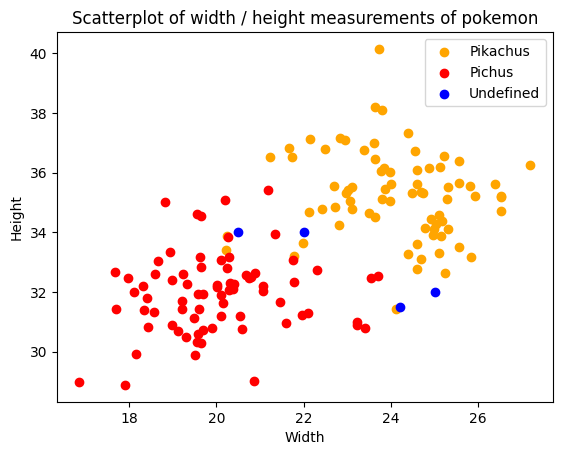

In [403]:
data = generate_data_from_file() # read in datapoints file and store as data
test_data = generate_test_data_from_file() # read in testpoints file and store as test_data

plot_data(data, test_data) # plot data and test data points

## Calculate distance and categorize test point

Majority vote of 1:

In [404]:
data = generate_data_from_file() # read in datapoints file and store as data
test_data = generate_test_data_from_file() # read in testpoints file and store as test_data
amount_votes = 1 # amount of closest points to consider for majority vote

for point in range(len(test_data["undefined"]["width"])): # loop through all test data points:
    # categorize point and store to result
    result = categorize_point([test_data["undefined"]["width"][point], test_data["undefined"]["height"][point]], data, amount_votes)

    # print result
    print(f'Point {test_data["undefined"]["width"][point], test_data["undefined"]["height"][point]} calculated as "{result[0].capitalize()}"')
    print(f"({result[1] * 100:.1f}% certainty based on a majority vote of {amount_votes})\n")

Point (25.0, 32.0) calculated as "Pikachu"
(100.0% certainty based on a majority vote of 1)

Point (24.2, 31.5) calculated as "Pikachu"
(100.0% certainty based on a majority vote of 1)

Point (22.0, 34.0) calculated as "Pikachu"
(100.0% certainty based on a majority vote of 1)

Point (20.5, 34.0) calculated as "Pichu"
(100.0% certainty based on a majority vote of 1)



Majority vote of 10:

In [405]:
data = generate_data_from_file() # read in datapoints file and store as data
test_data = generate_test_data_from_file() # read in testpoints file and store as test_data
amount_votes = 10 # amount of closest points to consider for majority vote

for point in range(len(test_data["undefined"]["width"])): # loop through all test data points:
    # categorize point and store to result
    result = categorize_point([test_data["undefined"]["width"][point], test_data["undefined"]["height"][point]], data, amount_votes)

    # print result
    print(f'Point {test_data["undefined"]["width"][point], test_data["undefined"]["height"][point]} calculated as "{result[0].capitalize()}"')
    print(f"({result[1] * 100:.1f}% certainty based on a majority vote of {amount_votes})\n")

Point (25.0, 32.0) calculated as "Pikachu"
(80.0% certainty based on a majority vote of 10)

Point (24.2, 31.5) calculated as "Pichu"
(53.4% certainty based on a majority vote of 10)

Point (22.0, 34.0) calculated as "Pikachu"
(70.0% certainty based on a majority vote of 10)

Point (20.5, 34.0) calculated as "Pichu"
(80.0% certainty based on a majority vote of 10)



## Manually input point to categorize

In [410]:
data = generate_data_from_file() # read in datapoints file and store as data

user_input = clean_user_input() # prompt user to input a point
result = categorize_point([user_input[0], user_input[1]], data, user_input[2]) # categorize point and store to result

# print result
print(f"Width, height {user_input[0], user_input[1]} calculated as '{result[0]}' with {result[1] * 100:.1f}% certainty (based on a majority vote of {user_input[2]})")

'-1.0' is not a valid input, make sure to enter positive numbers only
could not convert string to float: 'cookie' is not a valid point, make sure to enter 2-3 positive numbers
Width, height (32.5, 23.4) calculated as 'pikachu' with 70.0% certainty (based on a majority vote of 10)


## Randomly split original data into new test and training data  
Calculate accuracy of predicted categories  
Plot graph of test and training points

Accuracy of categorization: 96.0%
Correct predictions: Pikachu 24/25, Pichu 24/25 (based on a majority vote of 10


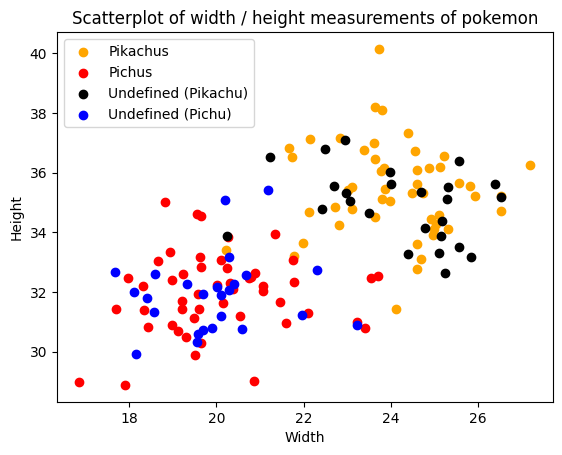

In [407]:
data = generate_data_from_file() # read in datapoints file and store as data
test_data, training_data = generate_test_training_data(data) # split datapoints in data randomly into 2 groups; test and training data
amount_votes = 10 # amount of closest points to consider for majority vote

plot_data(training_data, test_data) # plot test and training data points

# categorize points of test data compared to training data, and calculate accuracy of predictions
accuracy, TP, TN, FP, FN, incorrect_predictions = calculate_accuracy(test_data, training_data, amount_votes)

print(f"Accuracy of categorization: {accuracy * 100}%") # print results
print(f"Correct predictions: Pikachu {TP}/{TP + FP}, Pichu {TN}/{TN + FN} (based on a majority vote of {amount_votes}")

Plot graph of incorrectly predicted test points next to training points

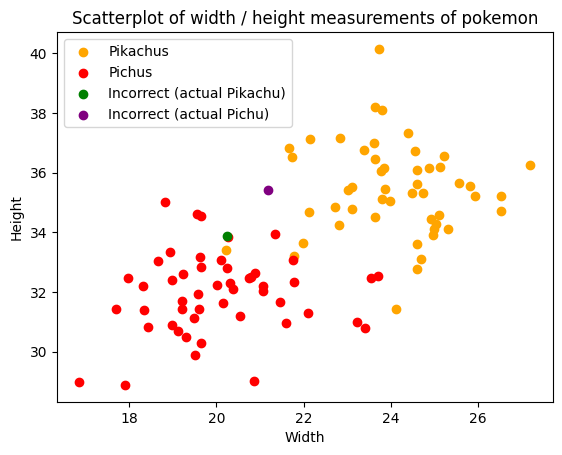

In [408]:
plot_data(training_data, incorrect_predictions = incorrect_predictions) # plot all incorrectly categorized points

## Plot accuracy of multiple sets of test and training data

Randomly split data into test and training data  
Calculate accuracy of test data categorization compared to training data  
Graph calculated accuracy  
Calculate average accuracy of multiple sets of simulations  

Prediction accuracy of simulation 1: 98.0% - Correct predictions: Pikachu 25/25, Pichu 24/25
Prediction accuracy of simulation 2: 96.0% - Correct predictions: Pikachu 25/25, Pichu 23/25
Prediction accuracy of simulation 3: 96.0% - Correct predictions: Pikachu 24/25, Pichu 24/25
Prediction accuracy of simulation 4: 92.0% - Correct predictions: Pikachu 23/25, Pichu 23/25
Prediction accuracy of simulation 5: 96.0% - Correct predictions: Pikachu 24/25, Pichu 24/25
Prediction accuracy of simulation 6: 92.0% - Correct predictions: Pikachu 23/25, Pichu 23/25
Prediction accuracy of simulation 7: 96.0% - Correct predictions: Pikachu 23/25, Pichu 25/25
Prediction accuracy of simulation 8: 92.0% - Correct predictions: Pikachu 22/25, Pichu 24/25
Prediction accuracy of simulation 9: 92.0% - Correct predictions: Pikachu 24/25, Pichu 22/25
Prediction accuracy of simulation 10: 98.0% - Correct predictions: Pikachu 24/25, Pichu 25/25

Average accuracy of all 10 simulations: 94.8%


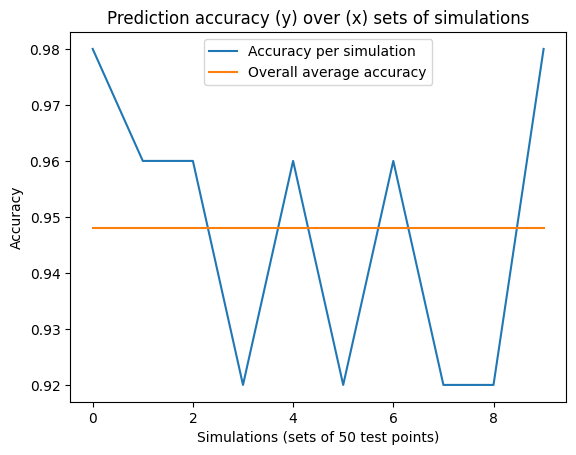

In [409]:
amount_simulations = 10 # amount of simulations sets to run
amount_votes = 10 # amount of closest points to consider for majority vote
accuracy_list = [] # stores accuracy results from each simulation set

for i in range(amount_simulations):
    data = generate_data_from_file() # read in datapoints file and store as data
    test_data, training_data = generate_test_training_data(data) # split datapoints in data randomly into 2 groups; test and training data

    # categorize points of test data compared to training data, and calculate accuracy of predictions
    accuracy, TP, TN, FP, FN, incorrect_predictions = calculate_accuracy(test_data, training_data, amount_votes)
    accuracy_list.append(accuracy) # append accuracy results to list
    
    # print results of current simulation
    print(f"Prediction accuracy of simulation {i + 1}: {accuracy * 100}% - Correct predictions: Pikachu {TP}/{TP + FP}, Pichu {TN}/{TN + FN}")

average_accuracy = sum(accuracy_list) / len(accuracy_list) # calculate average accuracy (across all sets of simulations)

# plot results:
plt.plot(accuracy_list, label = "Accuracy per simulation")
plt.plot(range(amount_simulations), [average_accuracy for i in range(amount_simulations)], label = "Overall average accuracy")
plt.title("Prediction accuracy (y) over (x) sets of simulations")
plt.xlabel("Simulations (sets of 50 test points)")
plt.ylabel("Accuracy")
plt.legend();

print(f"\nAverage accuracy of all {amount_simulations} simulations: {average_accuracy * 100:.1f}%")